## <span style="color:darkblue">**Лабораторная работа 3. Построение системы нечеткого вывода. Задание**</span> 

### <span style="color:darkred">**Пожалуйста соблюдайте следующее наименование Ваших проектов:**</span> 

**L**[Номер Лабораторной Работы]**N**[Ващ Номер по Списку]**.ipynb**.

**Например:** L3N1.ipynb

### Подключение библиотеки к своему проекту:

In [1]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random

# установка вывода графиков в окне jupiter
%matplotlib inline

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

Импортируем необходимые пакеты по нечёткой логике:

In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Практическое задание

### Исходные данные:

**1. Какую заработную плату выплачивать новому сотруднику?**  
Данная задача описывается следующими предложениями:  
•	Если образование высшее или стаж большой, то заработная плата высокая.  
•	Если образование средне-техническое или стаж имеется, но не большой, то заработная плата средняя.  
•	Если образование среднее или стаж маленький, то заработная плата низкая.

Образование оценивается по 10 бальной шкале (0 – среднее, 5 – средне-техническое, 10 – высшее). Стаж также оценивается по 10 бальной шкале (0 – маленький, 10 – большой). 

**2. Сколько бракованной продукции будет при данном оборудовании и сырье?**  
Данная задача описывается следующими предложениями:  
•	Если оборудование современное, надежное и сырье качественное, то процент брака низкий.  
•	Если сырье среднего качества или оборудование изношенное, то процент брака средний.  
•	Если сырье низкого качества или оборудование практически не работоспособно, то процент брака высокий.  

Производительность оборудования оценивается по 10 бальной шкале (0 – оборудование не работоспособно, 10 – надежное). Сырье также оценивается по 10 бальной шкале (0 – низкое качество, 10 – высокое). 5% считается низким процентом брака, 15% – средним, 25% – высоким.

**3. Какого рода повреждения принесет танку попадание противотанкового снаряда?**  
Предположим, что обстрел ведется с расстояния в 1000 метров 125 мм снарядами.  
Данная задача описывается следующими предложениями:  
•	Если броня «тонкая» и танк без «активных»  систем защиты, то считаем, что снаряд пробил броню.  
•	Если броня «средняя» и танк имеет «умеренную» систему защиты, то считаем повреждение кондиционное.  
•	Если броня «толстая» и танк имеет «активную» систему защиты, то считаем повреждения минимальными.  

**4. Какую сумму премиальных заплатить продавцу-консультанту магазина бытовых вещей?**  
Премиальные будут зависеть от двух параметров: суммы выручки и отзывов о работе со стороны покупателей, т.е. уровня обслуживания. Данная задача описывается следующими предложениями:  
•	Если обслуживание плохое и выручка маленькая, то премиальные маленькие.  
•	Если обслуживание хорошее и выручка составляет достаточную сумму, то премиальные средние.  
•	Если обслуживание наилучшего качества и сумма выручки более, чем достаточна, то премиальные высокие.  

Качество обслуживания и сумма выручки оцениваются по 10 бальной системе (0 – наихудшая оценка, 10 – наилучшая). Наименьшие премиальные составляют 5% от тарифной сетки, средние – 15%, высокие – 25%.

**5. Какую заработную плату получит сдельщик в зависимости от объема выполненной им работы и его посещаемости?**  
Данная задача описывается следующими предложениями:  
•	Если сдельщик выполнил маленький объем работ и имеет пропуски, то он получит маленькую заработную плату.  
•	Если сдельщик выполнил заданный ему объем работ, то он получит нормальную заработную плату.  
•	Если сдельщик перевыполнил заданный ему объем и не имеет пропусков, то он получит нормальную заработную плату + премия.  

Уровень выполненной работы оценивается по 10 бальной системе (0 – наихудший, 10 – наилучший).

**6. Какую оценку поставить студенту за выполнение и защиту лабораторной работы?**  
Данная задача описывается следующими предложениями:  
•	Если ответы на вопросы по лабораторной работе нечеткие, не аргументированные (т.е. плохие) или задание выполнено с большими недочетами, то оценка удовлетворительная.  
•	Если ответы на вопросы по лабораторной работе совершенно не верны и задание выполнено неправильно, то оценка не  удовлетворительная.  
•	Если ответы на вопросы удовлетворительные и задание выполнено с малыми недочетами, то оценка удовлетворительная.  
•	Если ответы на вопросы хорошие и задание выполнено с малыми недочетами, то оценка «хорошо».  
•	Если ответы логичные и четкие (т.е. отличные) и задание выполнено без недочетов, то оценка «отлично».  

Количество ответов и выполнение задания будем оценивать по 5-ти бальной системе (0 – наихудшая оценка, 5 – наилучшая). Оценка будет выставляться в интервале от 2 до 5.

**7. Какую сумму кредита банку выдать подавшему заявку в зависимости от уровня его заработной платы и его долгам по другим кредитам?**  
Предположим, что в банк поступила заявка с просьбой выдать кредит в размере 500 тысяч рублей. Данная задача описывается следующими предложениями:  
•	Если уровень заработной платы высокий и нет долгов по другим кредитам, то выдать запрошенную сумму кредита.  
•	Если уровень заработной платы средний и имеются долги по другим кредитам, то отказать в выдаче кредита.  
•	Если уровень заработной платы маленький, то отказать в выдаче кредита.  
•	Если уровень заработной платы высокий и имеются долги по другим кредитам, то выдать кредит с ограничениями.  
•	Если уровень заработной платы средний и не имеются долги по другим кредитам, то выдать кредит с ограничениями в сумме.  

Высокий уровень заработной платы: свыше 25–30 тысяч рублей, средний – 10–25 тысяч рублей, низкий – меньше 10 тысяч рублей.  

**8. Какие дивиденды получит владелец обыкновенных акций акционерного общества?**
Данная задача описывается следующими предложениями:  
•	Если акционерное общество получило большую чистую прибыль и акционер владеет акциями длительное время, то акционер получит большие дивиденды.  
•	Если акционерное общество получило приличную чистую прибыль, то акционер получит средний размер дивидендов.  
•	Если акционерное общество получило чистую прибыль близкую к нулю, то акционер получит маленькие дивиденды.  
•	Если акционер владеет акциями короткое время, то акционер не получит дивиденды.  
Размер чистой прибыли акционерного общества будет оценивать по 10-бальной системе (0 – размер чистой прибыли близок к нулю, 10 – наилучший размер чистой прибыли). Срок владения акциями, при котором акционер может рассчитывать на получение дивидендов, составляет не меньше 1 года.

**9. Какую скидку предоставить клиенту в магазине бытовой техники?**  
Данная задача описывается следующими предложениями:  
•	Если покупатель является VIP-клиентом  и сумма покупки большая, то скидка большая.  
•	Если сумма покупки маленькая и покупатель не является VIP-клиентом, то скидка маленькая.  
•	Если сумма покупки приличная, то скидка нормальная.  
Сумма покупки оценивается по 10-бальной системе (0 – сумма покупки минимальная, 10 – сумма покупки достаточная для предоставления максимальной скидки).

**10. Какую оценку поставить студенту на экзамене?**  
Данная задача описывается следующими предложениями:  
•	На экзамене один вопрос и одно задание;
•	Если ответ на вопрос нечеткий (не аргументированный) или задание выполнено с большими недочетами, то оценка удовлетворительная.  
•	Если ответ на вопрос совершенно не верный и задание выполнено неправильно, то оценка не  удовлетворительная.  
•	Если ответ на вопрос удовлетворительный и задание выполнено с малыми недочетами, то оценка удовлетворительная.  
•	Если ответ на вопрос хороший и задание выполнено с малыми недочетами, то оценка «хорошо».  
•	Если ответ на вопрос логичный и четкие (т.е. отличные) и задание выполнено без недочетов, то оценка «отлично».  

Качество ответа и выполнение задания будем оценивать по 5-ти бальной системе (0 – наихудшая оценка, 5 – наилучшая).
Оценка будет выставляться в интервале от 2 до 5.

**11. Какую сумму премиальных заплатить продавцу-консультанту магазина бытовых вещей?**  
Премиальные будут зависеть от двух параметров: суммы выручки и отзывов о работе со стороны покупателей, т.е. уровня обслуживания. Данная задача описывается следующими предложениями:  
•	Если обслуживание плохое и выручка маленькая, то премиальные маленькие.  
•	Если обслуживание хорошее и выручка составляет достаточную сумму, то премиальные средние.  
•	Если обслуживание наилучшего качества и сумма выручки более, чем достаточна, то премиальные высокие.  

Качество обслуживания и сумма выручки оцениваются по 10 бальной системе (0 – наихудшая оценка, 10 – наилучшая). Наименьшие премиальные составляют 5% от тарифной сетки, средние – 15%, высокие – 25%.

**12. Какую сумму кредита банку выдать подавшему заявку в зависимости от уровня его заработной платы и его долгам по другим кредитам?**  
Предположим, что в банк поступила заявка с просьбой выдать кредит в размере 500 тысяч рублей. Данная задача описывается следующими предложениями:  
•	Если уровень заработной платы высокий и нет долгов по другим кредитам, то выдать запрошенную сумму кредита.  
•	Если уровень заработной платы средний и имеются долги по другим кредитам, то отказать в выдаче кредита.  
•	Если уровень заработной платы маленький, то отказать в выдаче кредита.  
•	Если уровень заработной платы высокий и имеются долги по другим кредитам, то выдать кредит с ограничениями.  
•	Если уровень заработной платы средний и не имеются долги по другим кредитам, то выдать кредит с ограничениями в сумме.  

Высокий уровень заработной платы: свыше 25–30 тысяч рублей, средний – 10–25 тысяч рублей, низкий – меньше 10 тысяч рублей.  

**13. Какую заработную плату выплачивать новому сотруднику?**  
Данная задача описывается следующими предложениями:  
•	Если образование высшее или стаж большой, то заработная плата высокая.  
•	Если образование средне-техническое или стаж имеется, но не большой, то заработная плата средняя.  
•	Если образование среднее или стаж маленький, то заработная плата низкая.

Образование оценивается по 10 бальной шкале (0 – среднее, 5 – средне-техническое, 10 – высшее). Стаж также оценивается по 10 бальной шкале (0 – маленький, 10 – большой). 

### <span style="color:darkred">Задача: построить для выбранного варианта систему нечеткого вывода</span>

## Небольшая заготовка для выполнения Вашего задания:

**Задача:<span style="color:darkred"> Cколько официанту в ресторане дать на чай?</span>**
    
Данная задача описывается следующими предложениями:  
•	Если обслуживание плохое и еда подгоревшая, то чаевые маленькие.  
•	Если обслуживание хорошее, то чаевые средние.  
•	Если обслуживание отличное и еда превосходная, то чаевые щедрые.

Качество обслуживания и еды оценивается по 10-бальной системе (0 – наихудшая оценка, 10 – наилучшая).  
Маленькие чаевые составляют 5% от стоимости обеда, средние – 15%, а щедрые – 25%.


#### 1. Формирование базы правил
База правил — это множество правил, где каждому подзаключению сопоставлен определенный весовой коэффициент.

База правил может иметь следующий вид (для примера используются правила различных конструкций):

RULE_1: IF «Condition_1» THEN «Conclusion_1» (F1) AND «Conclusion_2» (F2);  
RULE_2: IF «Condition_2» AND «Condition_3» THEN «Conclusion_3» (F3);  
…  
RULE_n: IF «Condition_k» THEN «Conclusion_(q-1)» (Fq-1) AND «Conclusion_q» (Fq);  

In [3]:
quality = ctrl.Antecedent(np.linspace(0, 10, 1000), 'quality')
service = ctrl.Antecedent(np.linspace(0, 10, 1000), 'service')

Определим выходную переменную (для нашего примера: чаевые)

In [4]:
tip = ctrl.Consequent(np.linspace(0, 25, 1000), 'tip')

#### 2. Фаззификация входных переменных
Этап приведения к нечеткости. На вход поступают сформированная база правил и входные данные (quality, service). Целью этого этапа является получение значений истинности для всех подусловий из базы правил. 
Это происходит так: для каждого из подусловий находятся значения для $\mu_{quality}(x_i)$ и для $\mu_{service}(x_i)$. Таким образом получается множество нечетких значений.

Воспользуемся функцией генерации распределения (варианты: 3,5,7):

In [5]:
quality.automf(3)

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


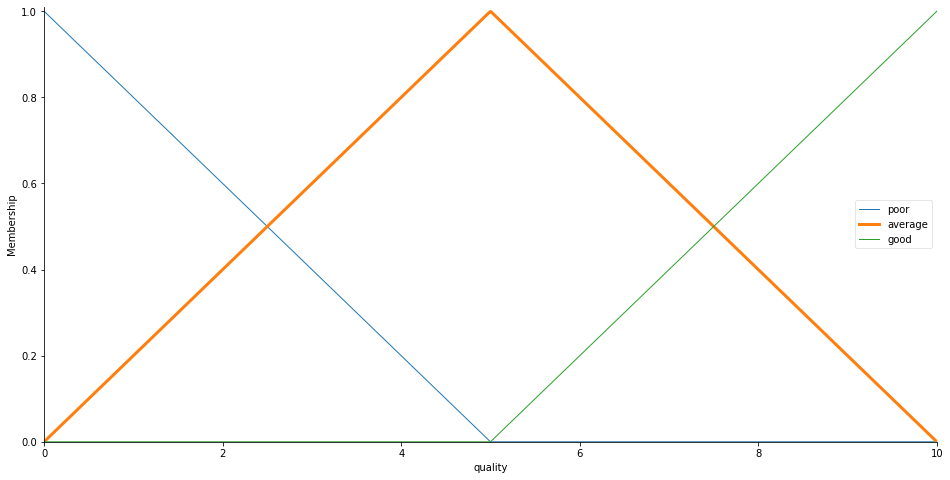

In [6]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# графический вывод
quality['average'].view();

In [7]:
service.automf(5)

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


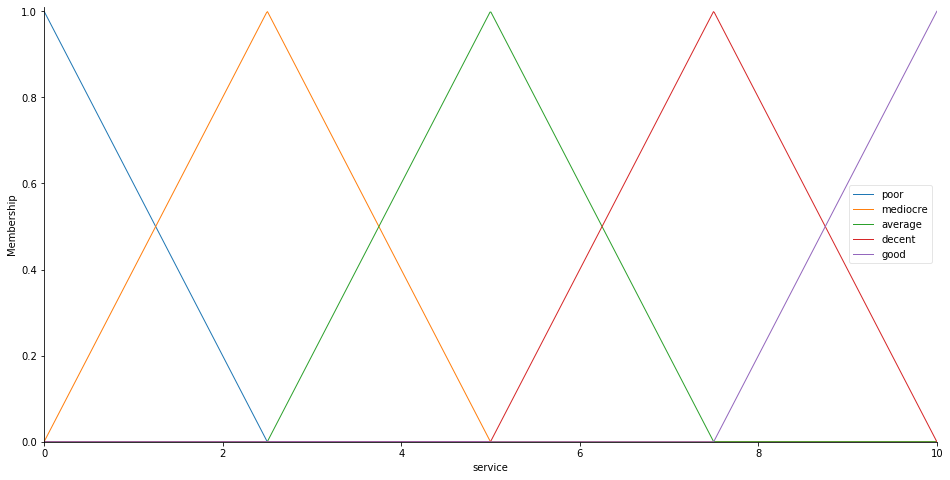

In [8]:
# графический вывод
service.view();

Задание распределения чаевых:

In [9]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

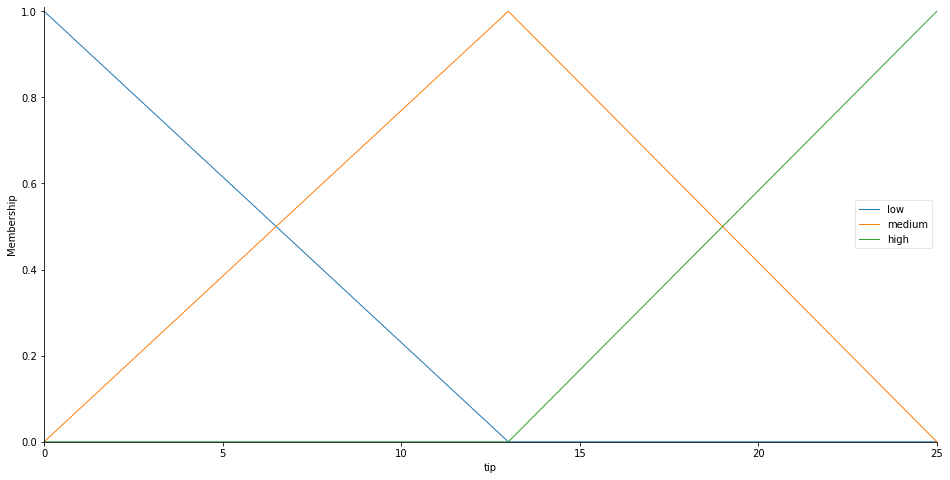

In [10]:
# графический вывод
tip.view();

#### 3. Агрегирование подусловий
Условие правил может быть составным, т.е. включать подусловия, связанные между собой при помощи логической операции «AND». Целью этого этапа является определение степени истинности условий для каждого правила системы нечеткого вывода. Упрощенно говоря, для каждого условия находим минимальное значение истинности всех его подусловий.

In [11]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

#### Этап 4. Активизация подзаключений

Цель этапа — получение совокупности «активизированных» нечетких множеств для каждого из подзаключений в базе правил.

Активизация в общем случае во многом аналогична композиции нечетких отношений, но не тождественна  ей. Поскольку в системах  нечеткого  вывода  используются  лингвистические переменные, то формулы для нечеткой композиции теряют свое значение. В действительности при формировании базы правил системы нечеткого вывода задаются весовые коэффициенты для каждого правила (по умолчанию предполагается, если весовой коэффициент не задан явно, то его значение равно 1).

**Этап 5. Акумуляция заключений**

Аккумуляция  или  аккумулирование  в  системах  нечеткого  вывода  представляет  собой процедуру или процесс нахождения функции принадлежности для каждой из выходных лингвистических переменных множества.

Цель аккумуляции заключается в том, чтобы объединить или аккумулировать все степени истинности заключений (подзаключений) для получения функции принадлежности каждой из выходных переменных. Причина необходимости выполнения этого этапа состоит в том,  что  подзаключения, относящиеся к одной и той же выходной лингвистической переменной, принадлежат различным правилам системы нечеткого вывода.

Этап  аккумуляции  считается  законченным,  когда  для  каждой  из  выходных  лингвистических  переменных  будут  определены  итоговые  функции  принадлежности  нечетких множеств их значений.

In [12]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [14]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

#### Этап 6. Дефаззификация выходных переменных
Цель дефаззификациии получить количественное значение (crisp value) для каждой из выходных лингвистических переменных.

In [15]:
# Crunch the numbers
tipping.compute()

# вывод результата
print(tipping.output['tip'])

20.97628758260477


20.97628758260477


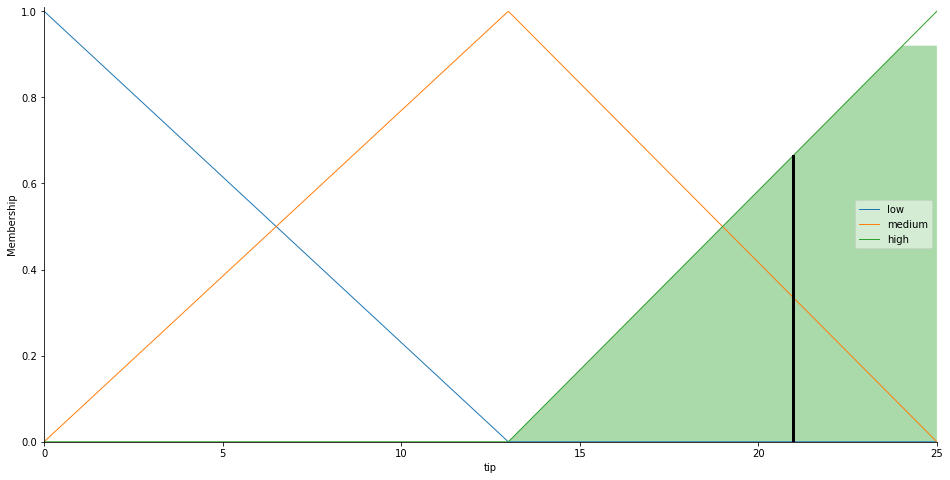

In [16]:
print(tipping.output['tip'])
tip.view(sim=tipping)

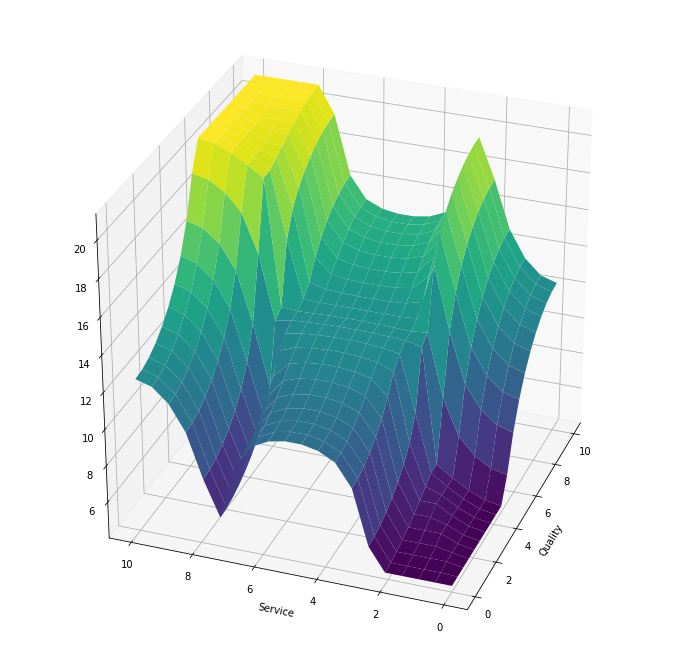

In [17]:
# We can simulate at higher resolution with full accuracy
inval = np.linspace(0, 10, 20)
x, y = np.meshgrid(inval, inval)
z = np.zeros_like(x)

# Loop through the system [q x s] times to collect the control surface
for i in range(20):
    for j in range(20):
        tipping.input['quality'] = x[i, j]
        tipping.input['service'] = y[i, j]
        tipping.compute()
        z[i, j] = tipping.output['tip']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

ax.set_xlabel('Quality')
ax.set_ylabel('Service')

#cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
#cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(30, 200)